# Exploración de Datos de Calidad del Aire

## Importación de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carga y Exploración Inicial de los Datos

In [2]:
# Cargar datos
df = pd.read_csv("../data/data.csv", sep=',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [4]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


## Análisis y Tratamiento de Datos Faltantes

Las ultimas dos columnas no incluye ningun dato, por lo que se eliminan

In [5]:
df_clean = df.iloc[:, :-2].copy()

Algunas mediciones estám registradas con valores de -200, lo que indica puntos de datos faltantes o no válidos.

In [6]:
df_clean.replace(-200, np.nan, inplace=True)

In [7]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')
df_clean['Time'] = pd.to_datetime(df_clean['Time'], format='%H:%M:%S', errors='coerce').dt.time

In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   NMHC(GT)       914 non-null    float64       
 5   C6H6(GT)       8991 non-null   float64       
 6   PT08.S2(NMHC)  8991 non-null   float64       
 7   NOx(GT)        7718 non-null   float64       
 8   PT08.S3(NOx)   8991 non-null   float64       
 9   NO2(GT)        7715 non-null   float64       
 10  PT08.S4(NO2)   8991 non-null   float64       
 11  PT08.S5(O3)    8991 non-null   float64       
 12  T              8991 non-null   float64       
 13  RH             8991 non-null   float64       
 14  AH             8991 non-null   float64       
dtypes: datetime64[ns](1),

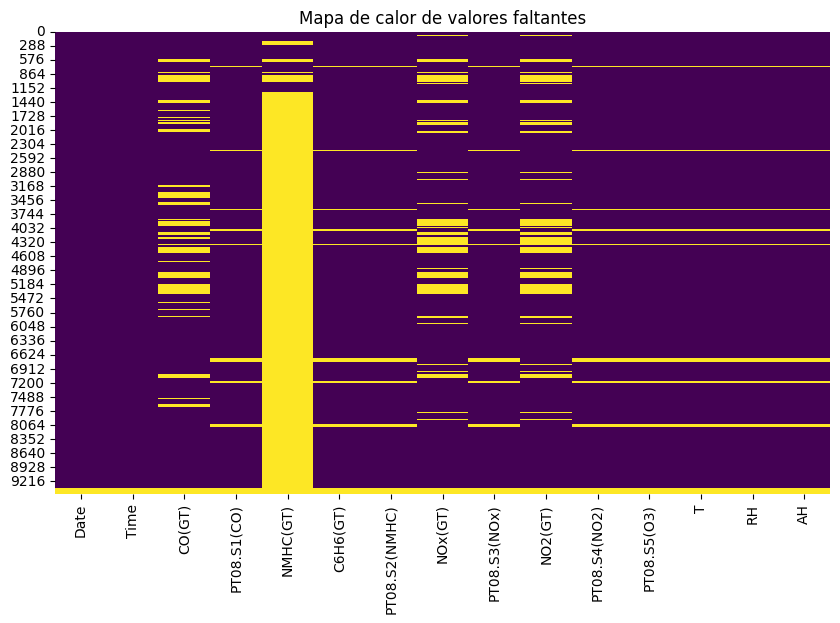

In [9]:
# Visualizar datos faltantes
plt.figure(figsize=(10,6))
sns.heatmap(df_clean.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de calor de valores faltantes")
plt.show()

### A. Eliminar Columnas y filas con Alta Cantidad de Valores Faltantes

In [10]:
# Eliminar la columna 'NMHC(GT)' por tener demasiados valores faltantes
df_clean.drop(columns=['NMHC(GT)'], inplace=True)

In [11]:
# Eliminar filas en las que todos los valores están faltantes
df_clean.dropna(how='all', inplace=True)

### Datos faltantes después de la fase A de limpieza

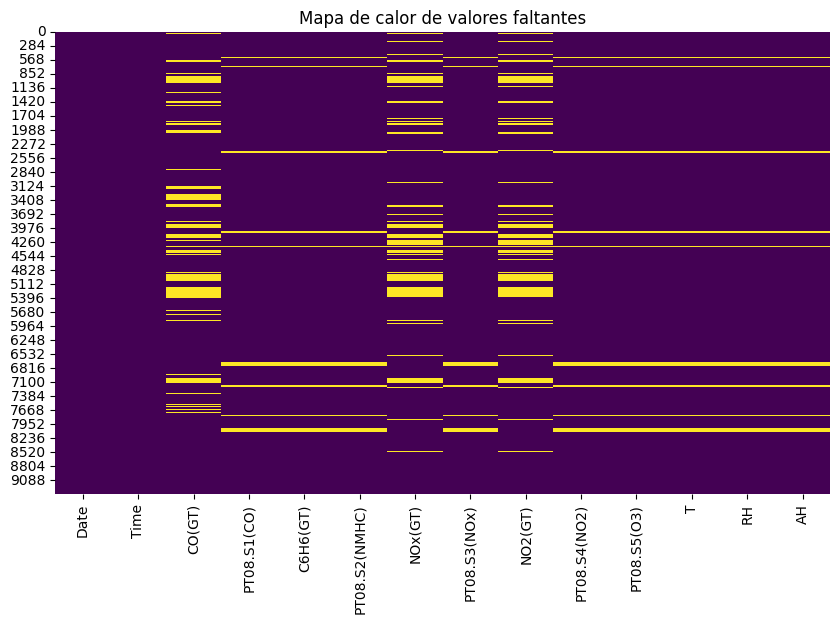

In [12]:
# Visualizar datos faltantes
plt.figure(figsize=(10,6))
sns.heatmap(df_clean.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de calor de valores faltantes")
plt.show()

In [13]:
porcentaje_NA = df_clean.isnull().mean() * 100
print(porcentaje_NA)

Date              0.000000
Time              0.000000
CO(GT)           17.986534
PT08.S1(CO)       3.911510
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
NOx(GT)          17.516298
PT08.S3(NOx)      3.911510
NO2(GT)          17.548360
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
dtype: float64


### B. Imputación de Valores Faltantes

In [14]:
columnas_alta_faltante = ['CO(GT)', 'NOx(GT)', 'NO2(GT)']

for col in columnas_alta_faltante:
    if df_clean[col].isnull().sum() > 0:  # Verificar si aún quedan NaN después de la interpolación
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

In [15]:
df_clean = df_clean.interpolate(method='linear') # Para columnas con menos del 4% de datos faltantes

C:\Users\matun\AppData\Local\Temp\ipykernel_6232\1390524871.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_clean = df_clean.interpolate(method='linear') # Para columnas con menos del 4% de datos faltantes


### Datos faltantes después de la fase B de limpieza

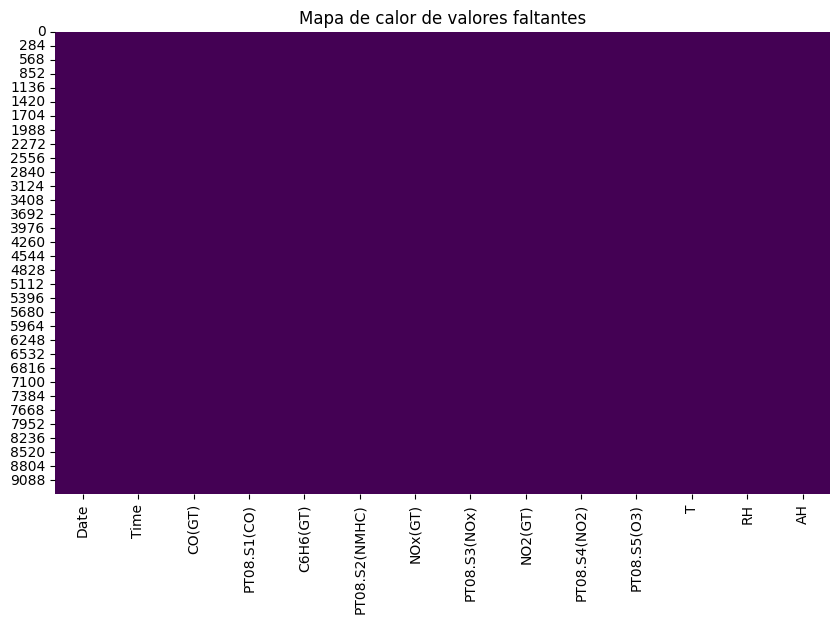

In [16]:
# Visualizar datos faltantes
plt.figure(figsize=(10,6))
sns.heatmap(df_clean.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de calor de valores faltantes")
plt.show()

In [17]:
missing_percentage = df_clean.isnull().mean() * 100
print(missing_percentage)

Date             0.0
Time             0.0
CO(GT)           0.0
PT08.S1(CO)      0.0
C6H6(GT)         0.0
PT08.S2(NMHC)    0.0
NOx(GT)          0.0
PT08.S3(NOx)     0.0
NO2(GT)          0.0
PT08.S4(NO2)     0.0
PT08.S5(O3)      0.0
T                0.0
RH               0.0
AH               0.0
dtype: float64


In [18]:
# Exportar el DataFrame limpio a un archivo CSV
df_clean.to_csv('../data/data_clean.csv', index=False)

## Exploración de los datos

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   C6H6(GT)       9357 non-null   float64       
 5   PT08.S2(NMHC)  9357 non-null   float64       
 6   NOx(GT)        9357 non-null   float64       
 7   PT08.S3(NOx)   9357 non-null   float64       
 8   NO2(GT)        9357 non-null   float64       
 9   PT08.S4(NO2)   9357 non-null   float64       
 10  PT08.S5(O3)    9357 non-null   float64       
 11  T              9357 non-null   float64       
 12  RH             9357 non-null   float64       
 13  AH             9357 non-null   float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 1.1+ MB


In [20]:
df_clean.drop(columns=['Date']).describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.089302,1103.059741,10.179155,942.142620,235.178903,832.758897,112.373303,1453.298814,1032.544298,18.233408,49.191386,1.019621
std,1.323024,218.196346,7.503812,267.866611,195.091025,255.709833,43.948519,343.206131,404.447613,8.781791,17.194506,0.402203
min,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.200000,938.000000,4.500000,736.000000,112.000000,654.000000,86.000000,1227.000000,733.000000,11.700000,35.800000,0.732300
50%,1.800000,1067.000000,8.300000,910.012987,180.000000,804.000000,109.000000,1460.000000,970.000000,17.600000,49.600000,0.989500
75%,2.600000,1239.000000,14.100000,1119.000000,284.000000,968.000000,133.000000,1668.000000,1293.000000,24.300000,62.300000,1.306700
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


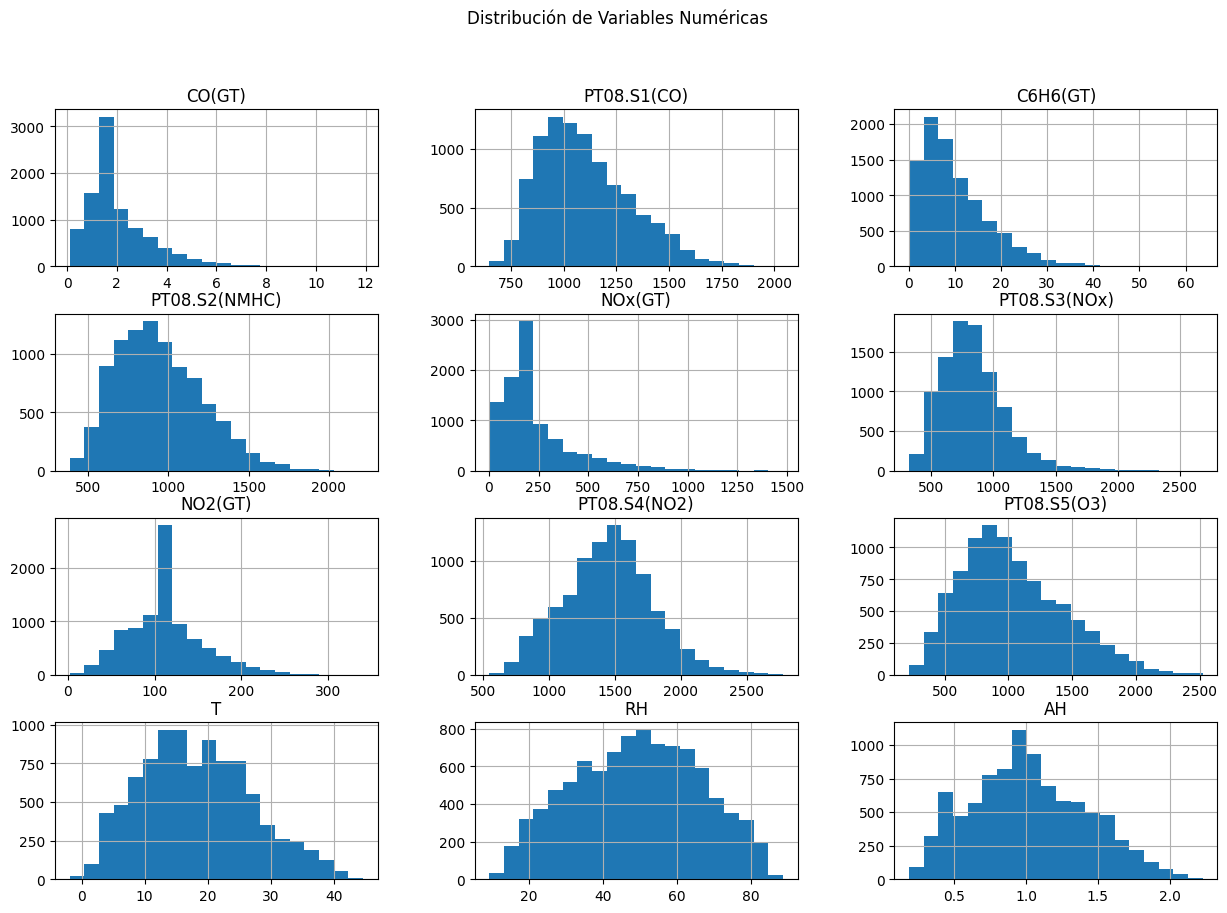

In [21]:
df_clean.drop(columns=['Date']).hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribución de Variables Numéricas')
plt.show()

Para modelos de clasificación como SVM, las variables con distribuciones muy sesgadas pueden afectar la efectividad del modelo. Es posible que se necesite una transformación (como logarítmica o raíz cuadrada) para normalizar las distribuciones y mejorar el rendimiento. Esto puede ayudar a SVM y también a Random Forest en términos de precisión y velocidad de convergencia.

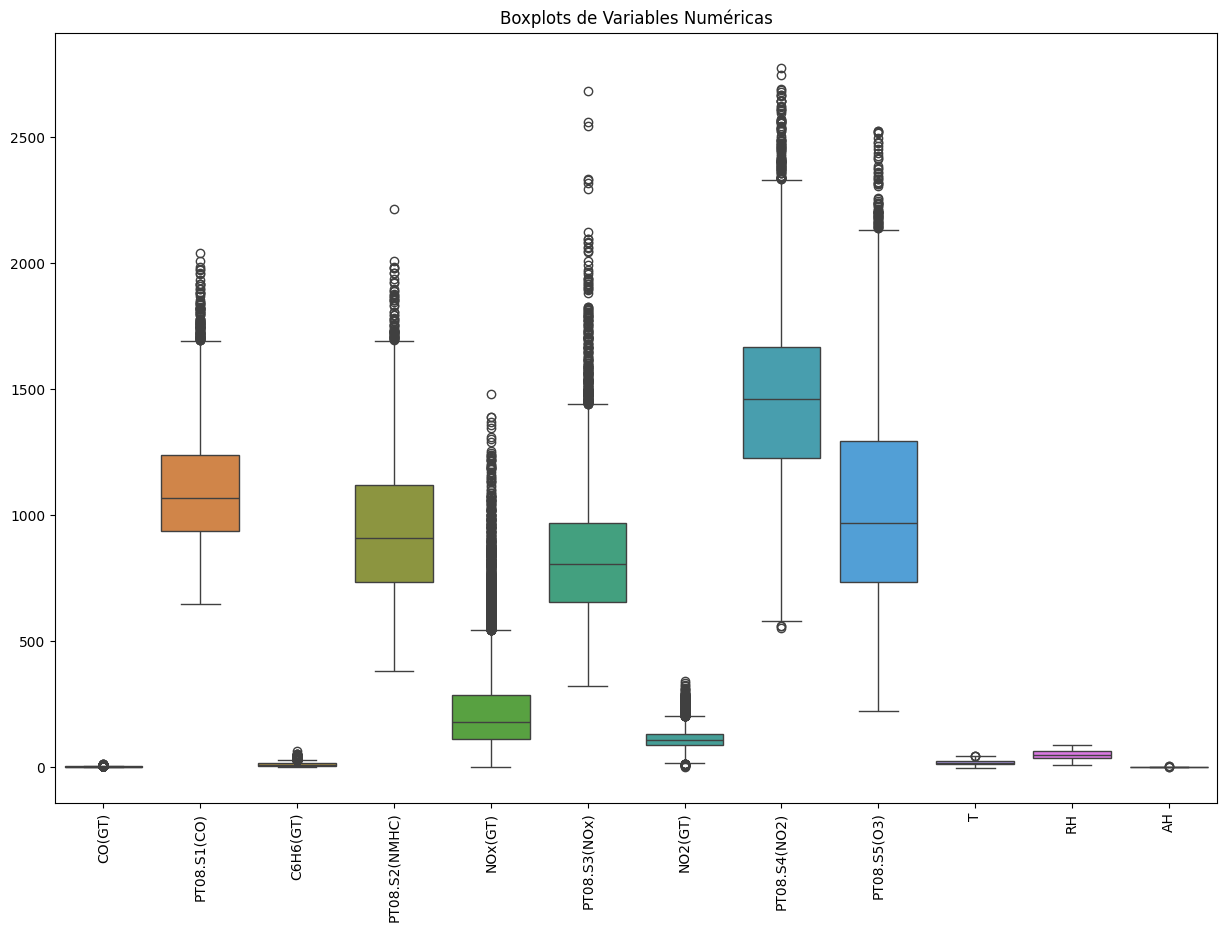

In [22]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_clean.drop(columns=['Date']))
plt.title('Boxplots de Variables Numéricas')
plt.xticks(rotation=90)
plt.show()

Los valores atípicos pueden afectar significativamente el rendimiento de SVM, ya que este modelo es sensible a ellos y podría intentar ajustarse a estos puntos extremos. Random Forest, en cambio, es más robusto frente a los outliers debido a su naturaleza de árbol de decisión.

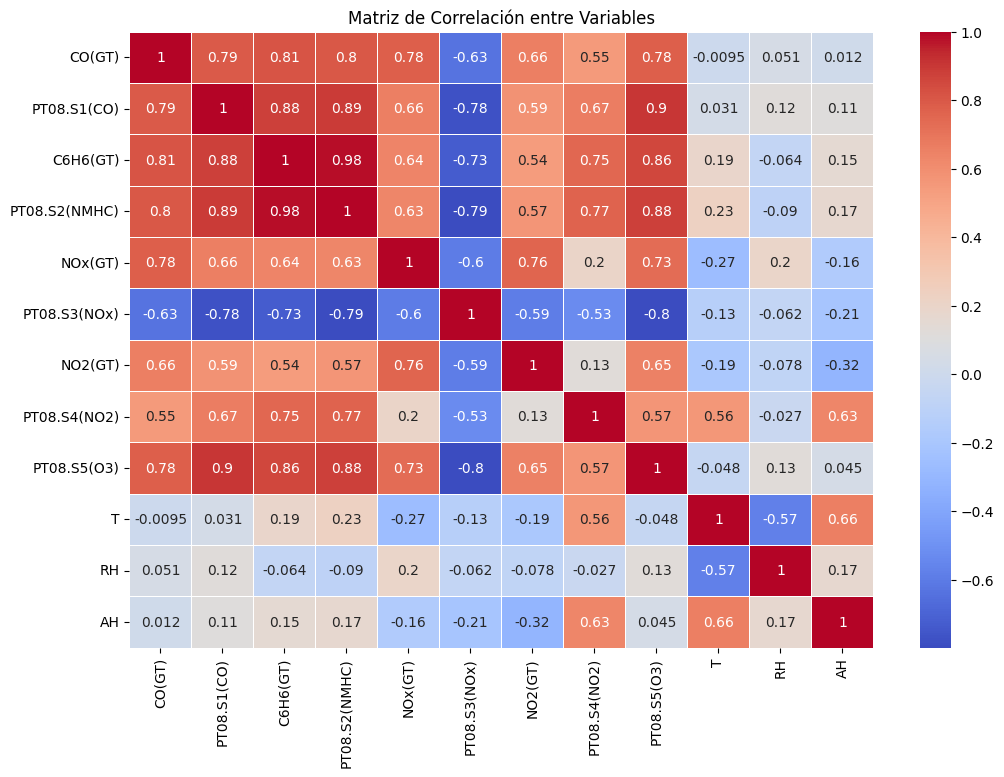

In [23]:
# Matriz de correlación sin la columna 'Date'
correlation_matrix = df_clean.drop(columns=['Date','Time']).corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables')
plt.show()

Las variables altamente correlacionadas pueden ser redundantes. En un modelo como Random Forest, el cual no se ve afectado mucho por la multicolinealidad, esto podría no ser un problema significativo. Sin embargo, en el caso de SVM, las variables correlacionadas pueden causar un aumento en el tiempo de entrenamiento sin agregar valor adicional. 